### Guidelines


The outcome of the notebook is to be able to determine the price of the Airbnb based on specifications. Also, to compare wether the price that is being asked for the Airbnb is a fair price or it's high.

This will be a complete end to end project that will walk through all the steps necessary with explanation along the way so whoever will be looking will understand why something happened and why I decided to take some steps.


By the end of it I will implement this to another project for more recent year and time here on Canada so I can use my own model to help me identify places on Airbnb that are both above the average price for it's specifications and for the ones that are lower helping me choosing destinations to go.

As known Airbnb is a platform where you can rent room or even an entire house to spend few days by yourself, family or friends while doing a vacation or simple weekend trip. As a recent arrive in Canada I have no understanding if prices are above or bellow what it should be it's normal so this model will help me make my decisions in the near future. 

The values that are going to be used to develop this model and notebook are Airbnb datasets from 2018-2020 from Rio de Janeiro - Brazil

### Hypothesis

- I do believe that period of time will decide if a price goes up or high, as example summer and winter.

- The location if it's really close by some turistic atraction or even metro, accessibility will determine the price

- Identifying what are the commodities that make the price go up by itself


Link para pegar o dataset no kaggle: 


Will be creating a dictionary with the months of the year, since when compiling everything to a unique dataframe the months got lost, this way it will be easier to identify patterns thorugh the months

In [1]:
# Importing dataset
import pandas as pd
import pathlib

months = {'jan':1,'fev':2,'mar':3,'abr':4,'mai':5,'jun':6,'jul':7,'ago':8,
         'set':9,'out':10,'nov':11,'dez':12,}

datasets = pathlib.Path('C:/Users/dnek/Desktop/GitHub_Datasets/Airbnb_Rio_dataset')
df_airbnb = pd.DataFrame()

for dataset in datasets.iterdir():
    month_name = dataset.name[:3]
    month = months[month_name]
    year = dataset.name[-8:]
    year = int(year.replace('.csv',''))
    df = pd.read_csv(datasets / dataset.name)
    df['year'] = year
    df['month'] = month
    df_airbnb = df_airbnb.append(df)
    
df_airbnb

C:\Users\dnek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (62,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\dnek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\dnek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,38844730,https://www.airbnb.com/rooms/38844730,20190923212307,2019-09-24,TRANSAMERICA BARRA DA TIJUCA R IV,"Em estilo contemporâneo, o Transamerica Prime ...",NaN,"Em estilo contemporâneo, o Transamerica Prime ...",none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,15.0,0.0,0.0
34325,38846408,https://www.airbnb.com/rooms/38846408,20190923212307,2019-09-24,Alugo para o Rock in Rio,"Confortável apartamento, 2 quartos , sendo 1 s...",O apartamento estará com mobília completa disp...,"Confortável apartamento, 2 quartos , sendo 1 s...",none,"Muito próximo ao Parque Olímpico, local do eve...",...,2.0,2.0,1125.0,1125.0,2.0,1125.0,0.0,1.0,0.0,0.0
34326,38846703,https://www.airbnb.com/rooms/38846703,20190923212307,2019-09-24,Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA,Apartamento quarto e sala COMPLETO para curtas...,Espaço ideal para até 5 pessoas. Cama de casal...,Apartamento quarto e sala COMPLETO para curtas...,none,NaN,...,3.0,3.0,1125.0,1125.0,3.0,1125.0,0.0,23.0,6.0,0.0
34327,38847050,https://www.airbnb.com/rooms/38847050,20190923212307,2019-09-24,Cobertura Cinematografica,Cobertura alto nivel,NaN,Cobertura alto nivel,none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,1.0,0.0,0.0


In [2]:
df_airbnb.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
maximum_nights_avg_ntm                          float64
number_of_reviews_ltm                           float64
calculated_host_listings_count_entire_homes     float64
calculated_host_listings_count_private_rooms    float64
calculated_host_listings_count_shared_rooms     float64
Length: 108, dtype: object

In [3]:
print(list(df_airbnb.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

- Starting the analysis at this point, there is too many rows and columsn, therefore the model can become really slow
- By a quick look at the list of columns, there are some columns that can be removed for better performance
- Will create a smaller csv file in order to perform some analysis and decide with more basis which column to remove

In [4]:
# df_airbnb.head(2000).to_csv('records.csv')

In [5]:
print(df_airbnb[['experiences_offered']].value_counts())

experiences_offered
none                   902210
dtype: int64


In [6]:
print("Empty values:",df_airbnb['square_feet'].isnull().sum())

Empty values: 888162


Through the analysis of the new CSV file the following columns were removed based on criteria of being useful, repeating information:
* id: There is no need of the ID column to make the model perform better predicting the price of Airbnb rental, it's a exclusive registration of the platform which will not impact on price.
* listing_url: The url link of the property will also not help the model to perform better, it will only cause the model to be slower.
* scrape_id, last_scraped: Also has 0 relevance towards the end goal of the prediction model.
* name,summary,space,description: All removed due to not be relevant towards the end result, the model will not analyse free text
* experiences_offered: full of empty values, no reason to use it during the model, as shown on print value above.
* neighborhood_overview, notes, transit, access, interactio, house_rules, thumbnail_url, medium_url, picture_url, xl_picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_acceptance_rate, host_thumbnail_url, host_picture_url, host_total_listing_count, host_has_profile_pic, host_identity_verified
* street, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleased, city, state, zipcode, market, smart_location, country_code, country, is_location_exact:  All address information but longitude and latitude which will give the same information, in this way will try to avoid the model to be bias towards the location.
* square_feet: too many empty values, 800k compare to a dataset of 900k
* weekly_price, monthly_price: since the model will try to predict the daily price those two columns will not be useful 
* calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365: the availability and calendar_updated will not impact on the price of the model
* calendar_last_scraped: will not impact to determine the price
* first_review, last_review: the date of the reviews will not impact the price
* requires_license, license, jurisdiction: will not impact on the machine learning model
* require_guest_profile_picture, require_guest_phone_verification, calculated_host_listings_count, reviews_per_month will not impact as well on the model



Columns kept:
* host_response_rate: the availability of the host to provide support can increase the price
* host_is_superhost: being a super host can influenciate the price of it's rent
* host_listings_count: amount of properties the host has listed on the platform, this might impact on the price
* property_type: gives different options between what's being rented so this can influenciate the price
* room_type: it gives the idea of the entire place or just a room, this can impact on the price
* accommodates,bathroom,bedrooms,beds,bed_types: ranges from how many people it can accommodate, to rooms and beds for people to sleep, which all of these features will definetely impact on the price
* amenities: what the house has to offer as cable, internet, all the perks involved.
* price: this will definetely impact the model
* security_deposit: this might influenciate the price of the rent, for example if needs a security deposit maybe the house is more expensive than one under the same conditions that does not
* cleaning_fee: if there is a cleaning involved, maybe will impact the overall price of the rent
* guests_included, extra_people: amount of people will impact over the rent price
* minimum_nights, maximum_nights: the amount of time that is necessary to rent might impact the rent price, since a package of certain nights is needed or no longer than certain period
* number_of_reviews: this might impact the rent price of the property
* all reviews columns: they will be kept because there could be some hidden data that the model can find
* instant_bookable, is_business_travel_ready

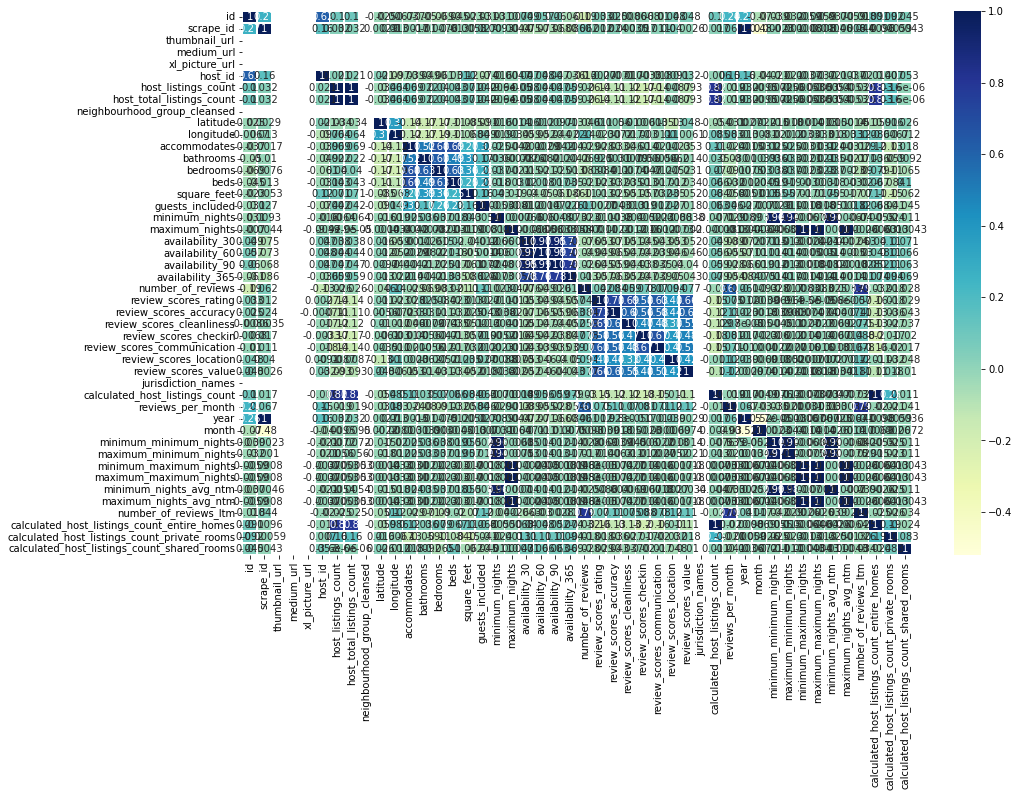

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_airbnb.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix, linewidths=0.5, annot=True,cmap="YlGnBu");

By crossing the information from the qualitative analysis and the heatmap, we can visualize that most of the columns decided to be kept align which will provide a proper model. 

Bellow I will be creating a list with the columns to be kept and applying a filter to the whole dataset so only those most valuables are considered for the model

In [8]:
columns = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude',
           'property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','square_feet','price',
           'security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','number_of_reviews',
           'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
           'review_scores_communication','review_scores_location','review_scores_value','instant_bookable',
           'is_business_travel_ready','cancellation_policy','year','month']

In [9]:
df_airbnb = df_airbnb.loc[:,columns]

Now will be checking the dataset after applying the filter of the columns looked from a qualitative analysis from the excel file and start to prepare the data, for cleaning, filling up misssing values and other important steps that need to be applied so the model can perform as best as possible

In [10]:
df_airbnb

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,year,month
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,within an hour,93%,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
34325,NaN,NaN,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
34326,within a few hours,74%,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9
34327,NaN,NaN,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9


The next step will be visualizing the empty values of each column and which has the most of it. 

If it has a lot of empty values compared to the amount of data, I will be removing the column.

In [11]:
df_airbnb.isnull().sum()

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
square_feet                    888162
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin          448650
review_score

By checking the empty values of the columns, one that will be removed is the square_feet, it has almost 900k of empty value where the dataset consists of 900k.

Some columns have almost half of the empty values of the columns so will proceed with the same method and will remove those columns as well

In [12]:
for column in df_airbnb:
    if df_airbnb[column].isnull().sum() > 300000:
        df_airbnb = df_airbnb.drop(column,axis=1)
        
df_airbnb

,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,price,guests_included,extra_people,minimum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,year,month
0,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,0.0,2.0,...,$133.00,2,$34.00,60,38,f,f,strict_14_with_grace_period,2018,4
1,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,...,$270.00,2,$51.00,4,205,t,f,strict,2018,4
2,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,1.0,1.0,...,$222.00,2,$215.00,3,85,f,f,strict,2018,4
3,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,...,$161.00,2,$45.00,4,208,f,f,strict,2018,4
4,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,...,$222.00,2,$68.00,2,200,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,0.0,2.0,...,$121.00,2,$50.00,1,0,f,f,flexible,2019,9
34325,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,2.0,3.0,...,$799.00,1,$0.00,2,0,f,f,flexible,2019,9
34326,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,1.0,2.0,...,$420.00,3,$30.00,3,0,f,f,strict_14_with_grace_period,2019,9
34327,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,$250.00,1,$0.00,1,0,f,f,strict_14_with_grace_period,2019,9


In [13]:
df_airbnb.isnull().sum()

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
year                           0
month                          0
dtype: int64

The result of removing the data that has more than 300k missing value, the new dataset has only 22 columns instead of the 34 after the first qualitative analysis.

Due to the fact that many columns were deleted by having NaN I will be performing the same operation in the others, since comparing 2000 lines to 900 lines, does not seem a big loss.

In [14]:
df_airbnb = df_airbnb.dropna()
df_airbnb

,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,price,guests_included,extra_people,minimum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,year,month
0,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,0.0,2.0,...,$133.00,2,$34.00,60,38,f,f,strict_14_with_grace_period,2018,4
1,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,...,$270.00,2,$51.00,4,205,t,f,strict,2018,4
2,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,1.0,1.0,...,$222.00,2,$215.00,3,85,f,f,strict,2018,4
3,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,...,$161.00,2,$45.00,4,208,f,f,strict,2018,4
4,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,...,$222.00,2,$68.00,2,200,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,0.0,2.0,...,$121.00,2,$50.00,1,0,f,f,flexible,2019,9
34325,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,2.0,3.0,...,$799.00,1,$0.00,2,0,f,f,flexible,2019,9
34326,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,1.0,2.0,...,$420.00,3,$30.00,3,0,f,f,strict_14_with_grace_period,2019,9
34327,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,$250.00,1,$0.00,1,0,f,f,strict_14_with_grace_period,2019,9


In [15]:
df_airbnb.isnull().sum()

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
year                        0
month                       0
dtype: int64

Now after removing only the values of the rows the dataset will not suffer a severe impact by removing the entire column as done on the previous step, however that was basically the entire column of the dataset with missing values

Will also check the type of each column so the reading of it is accurate and will result accordingly 

In [16]:
df_airbnb.dtypes

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
year                          int64
month                         int64
dtype: object

Comparing the information from types of the columns with the first line of the dataset

In [17]:
df_airbnb.iloc[0]

host_is_superhost                                                           f
host_listings_count                                                       1.0
latitude                                                           -22.946854
longitude                                                          -43.182737
property_type                                                       Apartment
room_type                                                     Entire home/apt
accommodates                                                                4
bathrooms                                                                 1.0
bedrooms                                                                  0.0
beds                                                                      2.0
bed_type                                                             Real Bed
amenities                   {TV,Internet,"Air conditioning",Kitchen,Doorma...
price                                                           

By comparing both information following columns have to be changed:

    - Price
    
    - Extra People

In [18]:
import numpy as np

Applying the necessary changes to both columns identified earlier

In [19]:
### Price
df_airbnb['price'] = df_airbnb['price'].str.replace('$','')
df_airbnb['price'] = df_airbnb['price'].str.replace(',','')
df_airbnb['price'] = df_airbnb['price'].astype(np.float32, copy=False)

### Extra People
df_airbnb['extra_people'] = df_airbnb['extra_people'].str.replace('$','')
df_airbnb['extra_people'] = df_airbnb['extra_people'].str.replace(',','')
df_airbnb['extra_people'] = df_airbnb['extra_people'].astype(np.float32, copy=False)

df_airbnb.dtypes

<ipython-input-19-14a93c4b391f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_airbnb['price'] = df_airbnb['price'].str.replace('$','')
<ipython-input-19-14a93c4b391f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb['price'] = df_airbnb['price'].str.replace('$','')
<ipython-input-19-14a93c4b391f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
year                          int64
month                         int64
dtype: object

## Exploratory Analysis

Checking the correlation between the columns that are left and check if they can tell if it's on the right path

In [20]:
df_airbnb.corr()

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,number_of_reviews,year,month
host_listings_count,1.000000,-0.034115,0.063635,0.069320,0.022332,0.039712,0.042788,0.092306,0.041932,-0.031589,-0.006441,-0.025974,0.031802,-0.009584
latitude,-0.034115,1.000000,0.370416,-0.142082,-0.169135,-0.165050,-0.113931,-0.092437,-0.091123,-0.041113,-0.016090,-0.046044,0.002595,0.002358
longitude,0.063635,0.370416,1.000000,-0.121746,-0.170504,-0.186332,-0.110392,-0.085526,0.049375,0.001723,-0.019213,0.135377,0.012589,-0.007981
accommodates,0.069320,-0.142082,-0.121746,1.000000,0.521909,0.675913,0.692740,0.269929,0.317563,0.078709,0.024583,-0.029873,-0.000808,-0.003446
bathrooms,0.022332,-0.169135,-0.170504,0.521909,1.000000,0.631544,0.491525,0.310847,0.171695,0.077831,0.035884,-0.069505,-0.009636,0.003829
bedrooms,0.039712,-0.165050,-0.186332,0.675913,0.631544,1.000000,0.625313,0.321678,0.259657,0.078900,0.036767,-0.083678,-0.007163,0.002786
beds,0.042788,-0.113931,-0.110392,0.692740,0.491525,0.625313,1.000000,0.204713,0.278757,0.077806,0.017696,-0.021365,-0.012212,0.000399
price,0.092306,-0.092437,-0.085526,0.269929,0.310847,0.321678,0.204713,1.000000,0.032171,0.044735,0.027418,-0.078023,0.017889,-0.003071
guests_included,0.041932,-0.091123,0.049375,0.317563,0.171695,0.259657,0.278757,0.032171,1.000000,0.290723,0.005280,0.113160,0.027499,-0.007374
extra_people,-0.031589,-0.041113,0.001723,0.078709,0.077831,0.078900,0.077806,0.044735,0.290723,1.000000,0.020384,0.012267,0.013560,-0.002604


It's better to visualize the above information as the heatmap as done previously

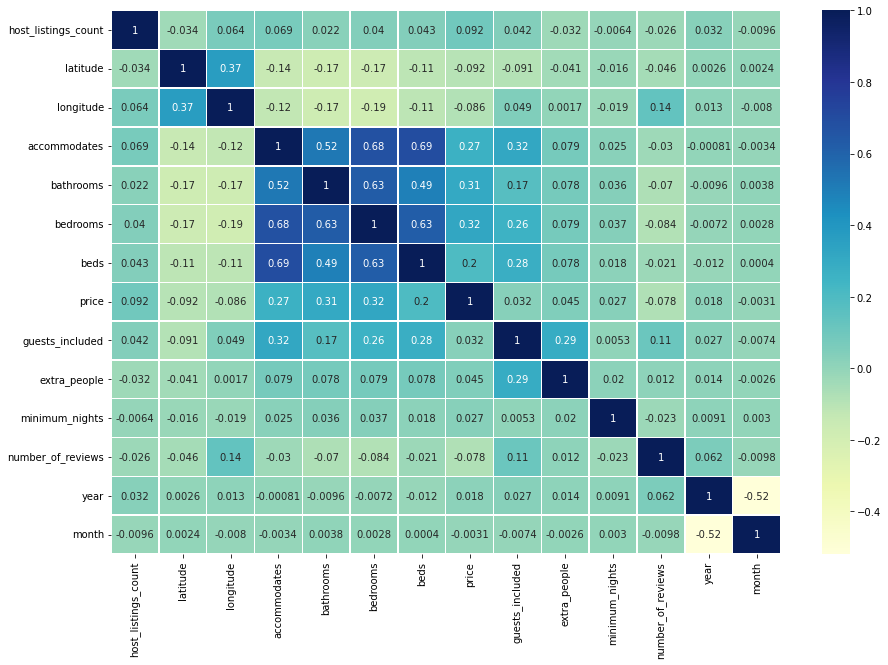

In [21]:
correlation_matrix = df_airbnb.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix, linewidths=0.5, annot=True,cmap="YlGnBu");

Analyzing the information describe from the correlation seems that all columns left are good to prepare the model and start working to predict the price.

Next steps: 
* Identify outliers from each columns:
    - The outlier will be calculated according to the amplitude between the 1st and 3rd quartile.
    - The amplitude between the difference from 3rd and 1st quartile.
* Calculate the limit of each outlier and removing the ones above


Will be creating functions to calculate the outlier on each column and graph for each column to better analyse the information being extracted from the dataset

In [22]:
def quartile_limits(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    amplitude = q3 - q1
    lower_limit = q1 - (1.5*amplitude)
    higher_limit = q3 + (1.5*amplitude)
    return lower_limit, higher_limit

In [23]:
quartile_limits(df_airbnb['price'])

(-524.0, 1276.0)

In [24]:
def box_plotting(column):
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=column,ax=ax1)
    ax2.set_xlim(quartile_limits(column))
    sns.boxplot(x=column,ax=ax2)

### Analyzing the Price column

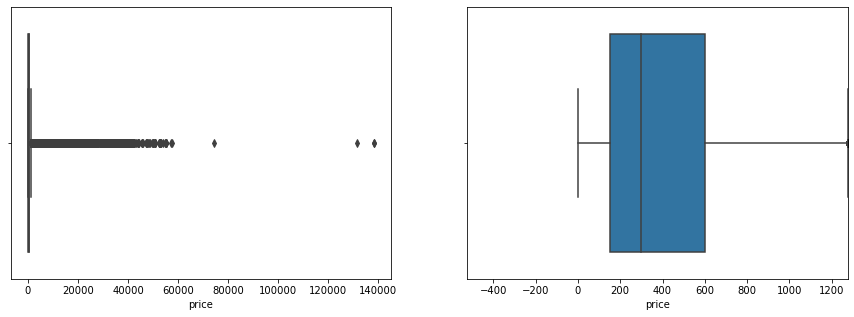

In [25]:
box_plotting(df_airbnb['price'])

In [30]:
def histogram(column):
    plt.figure(figsize=(15,5))
    sns.histplot(x=column,discrete=True,kde=True)

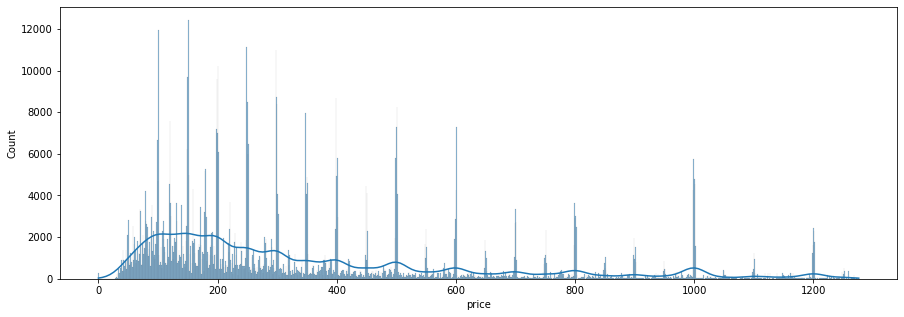

In [31]:
histogram(df_airbnb['price'])

As verifying the information provided by the graphs some outliers stand out into the it's daily price. 

I will be removing those outliers to leave only Airbnb values that are more related towards affordable money. It's good to know there are very luxury rents but that's not the main reason for the use of this code.

Will be applying the function of the quartile function to perform this task inside of a new function of "exclude_outlier" so I don't have to this manually which could lead to some miss delete or letting any pass by without properly creating conditions for it. 

In [32]:
def exclude_outliers(df, column):
    amount_lines = df.shape[0]
    lower_value, high_value = quartile_limits(df[column])
    df = df.loc[(df[column]>= lower_value) & (df[column] <= high_value),:]
    lines_excluded = amount_lines - df.shape[0]
    return df, lines_excluded

In [33]:
df_airbnb, amount_lines = exclude_outliers(df_airbnb, 'price')
print('{} amount of lines removed'.format(amount_lines))

28567 amount of lines removed


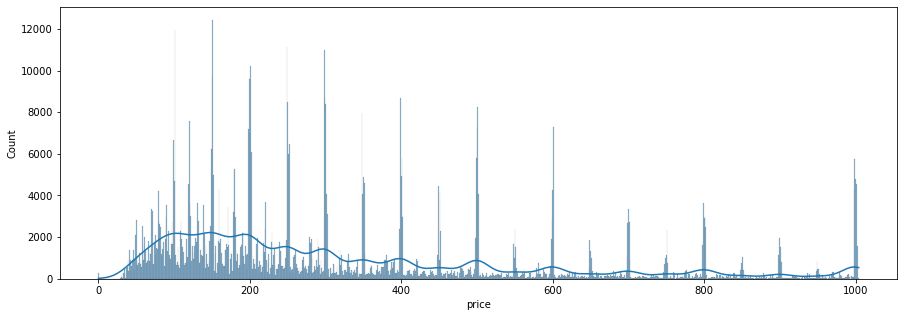

In [34]:
histogram(df_airbnb['price'])